<a href="https://colab.research.google.com/github/kb22/Tensorflow-Course/blob/master/Converting_Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting Celsius to Fahrenheit

In this notebook, I'll create a deep learning network that is able to create a relation between Celsius and Fahrenheit degrees and compare if the deep learning model is able to find a comparable relationshp.

## Background

The two most popular temperature scales are Celsius (C) and Fahrenheit (F). There is a simple linear conversion formula to convert from Celsius to Fahrenheit.

$$ F = C \times 1.8 + 32 $$

As this is a linear problem, it's a good start to learn about deep learning and also interpret the weights and biases.

## Import libraries

The first step is to import all necessary libraries. As I'll be using Keras and Tensorflow, I'll import them.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

I'll also set the logger to only log any errors.

In [0]:
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Data description

The first step is to create a celsius and fahrenheit values that the deep learning model will use to train on.
- **Features:** The set of input values given to the model are called features. In the present case, the features are the degree values in celsius.
- **Labels:** The set of output values for given input values are called labels. In the present case, the labels as the degree values in fahrenheit.
- **Example:** An example in the deep learning terminology refers to a pair of input/output.

In [3]:
celsius_values    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype = float)
fahrenheit_values = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype = float)

for index, celsius in enumerate(celsius_values):
  print("{} degree Celsius is {} degree Fahrenheit.".format(celsius, fahrenheit_values[index]))

-40.0 degree Celsius is -40.0 degree Fahrenheit.
-10.0 degree Celsius is 14.0 degree Fahrenheit.
0.0 degree Celsius is 32.0 degree Fahrenheit.
8.0 degree Celsius is 46.0 degree Fahrenheit.
15.0 degree Celsius is 59.0 degree Fahrenheit.
22.0 degree Celsius is 72.0 degree Fahrenheit.
38.0 degree Celsius is 100.0 degree Fahrenheit.


## Model creation

The next step is to create the model using tensorflow.

### Sequential Model

A sequential model is defined as a model in which all the layers are placed one after the other like in a sequence. The sequence model in tensorflow expects an array of layers which are stacked in the given order.

### Dense layer

A dense layer is basically a full connected layer in tensorflow. A fully connected layer means that all nodes in the given layer are connected with all nodes in the previous layer.

- **units:** The units defines the number of nodes that are present in that given layer.
- **input_shape:** The input shape is required in the first layer in the sequential model. It defines the number of inputs to the model at a given time. 

In [0]:
layer_0 = tf.keras.layers.Dense(units = 1, input_shape = [1])
model = tf.keras.Sequential([layer_0])

I've created the **Sequential model** with only layer. The layer has only 1 node.

However, this is not enough. We need to compile the model as well.

## Compiling the model

Compiling the model is necessary as we need to define a **loss function** on which to evaluate the model during training and the **optimizer** which will tweak the model weights to train the model.

- **loss function:** During each iteration the loss method is used to check the difference between the predicted label of the model and the actual label. The aim is to minimise this loss as much as possible.
- **optimizer:** The optimizer tweaks the weights and biases of the model to better understand the relation between the features and labels so it can predict on new data.

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

I'm using the **mean_squared_error** as the loss function and **Adam** as the optimizer with the learning rate of 0.1.

## Training the model

The `fit()` method is used to train the model on the training set.

- **x:** The input features into the model.
- **y:** The actual labels for the given training examples.
- **epochs:** The number of times the complete list of examples should be iterated over and over again.
- **validation_split:** The portion of training data to be used for validation.

In [0]:
history = model.fit(x = celsius_values, y = fahrenheit_values, epochs = 1000, verbose = False, validation_split = 0.2)

I'll train the model for over 1000 epochs. As there are 7 examples in the training set, the model will be trained for 7*1000 = 7000 times in total. I kept the verbose to `False` as this is a short training and I do not need the complete verbose data.

## Loss vs Epochs

I'll also take a look at the loss for both training and validation and see that the model learns well.

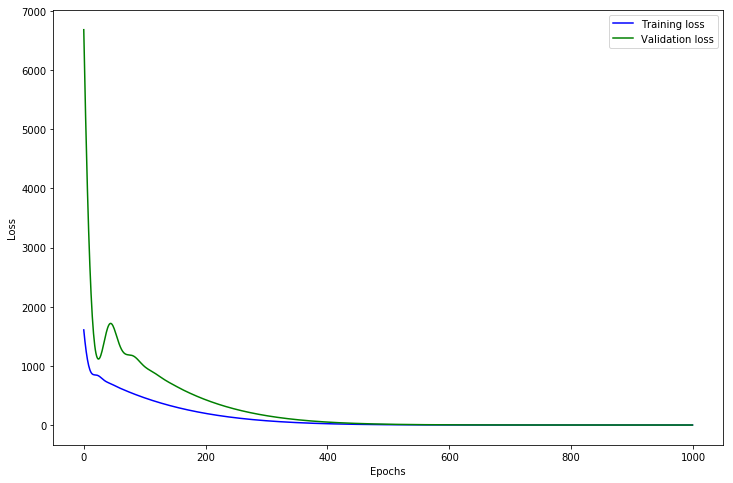

In [7]:
plt.figure(figsize = (12, 8))
plt.plot(history.history['loss'], label = 'Training loss', color = 'b')
plt.plot(history.history['val_loss'], label = 'Validation loss', color = 'g')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

After 1000 epochs, the model tends to get the training and validation loss close to zero.

## Make prediciton

As my model is now ready, I'll use it to get the fahrenheit values from celsius values on unseen data. Let's test what 100 degree celsius in fahrenheit is based on this model.

In [8]:
print("In real, 100 degree celsius in fahrenheit is {:.2f}".format(100*1.8 + 32))
print("According to model, 100 degree celsius in fahrenheit is {:.2f}".format(model.predict([100])[0][0]))

In real, 100 degree celsius in fahrenheit is 212.00
According to model, 100 degree celsius in fahrenheit is 211.57


## Evaluating weights

I will also take a look at the model weights to see what the model has learnt.

In [9]:
for weight in model.get_weights():
  print(weight)

[[1.796847]]
[31.886404]


The two values are close to the original equation and this is the reason why it is able to get such highly accurate predictions.

# Conclusion

From the result above, we can see that the model has very well trained on the data. It's really fascinating to see how the model that did not even know about the formula was able to identify the weights and biases that led it to make such highly accurate predictons.